# LOGISTIC REGRESSION USING THE TITANIC DATASET

### Predicting the Survival for the titanic dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
train = pd.read_csv('titanic_train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORATORY DATA ANALYSIS

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


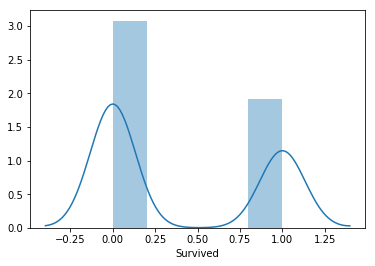

In [18]:
sns.distplot(train['Survived'])

In [19]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


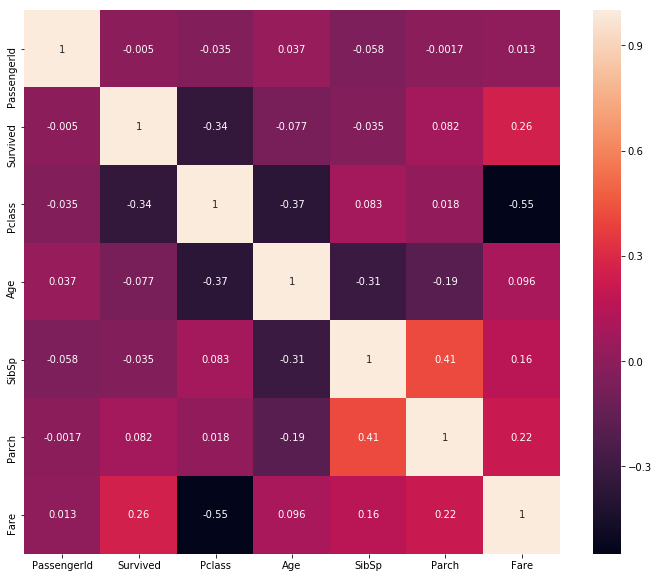

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True)

In [25]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


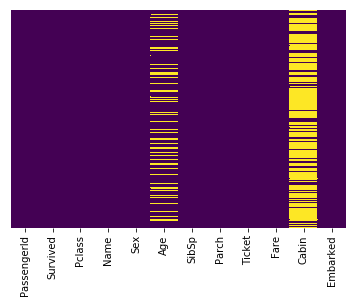

In [28]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#Ever Yellow dash represents true which from this data shows us that we are missing a bunch of age 
#information, a whole lot of cabin information

#### The propoortion of the age data missing shows that there may be room for some useful inputation in the form of information
#### however with the cabin data the missing data seems so much that there may be no room for any useful inputation by manipulating
#### the data.

In [30]:
sns.set_style('whitegrid')

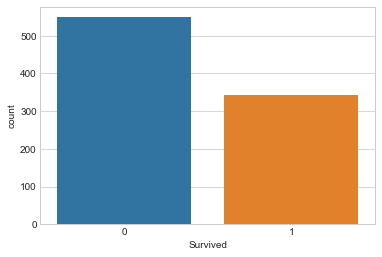

In [31]:
sns.countplot(x='Survived', data=train)

#### This plot shows us on a visual level that quite a number of people in our dataset did not survive, say about 550 while about 320 did survive.

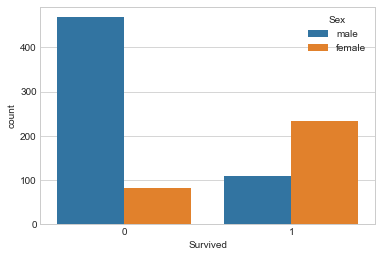

In [32]:
sns.countplot(x='Survived', hue="Sex", data=train)

#### Looking at this last plot here, we have some informative data we can extract from this, it shows that of the people that did not survive, most were more likely to be male.

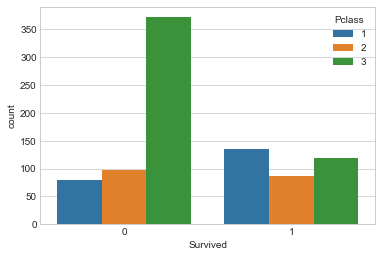

In [34]:
sns.countplot(x='Survived',hue='Pclass', data=train)

#### The passenger class leaves us with some info again, it shows that most of the people that did not survive were more likely to be in the third class, i.e the cheaper/cheapest class

C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


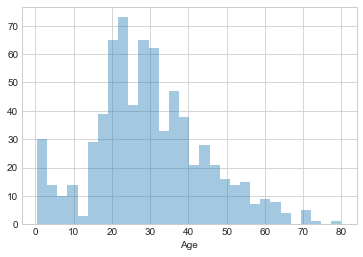

In [38]:
sns.distplot(train['Age'].dropna(), kde =False, bins = 30)

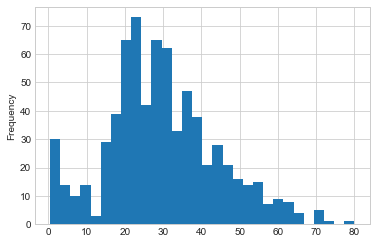

In [41]:
#### Using Pandas built-in data Viz to do the same.

train['Age'].plot.hist(bins = 30)

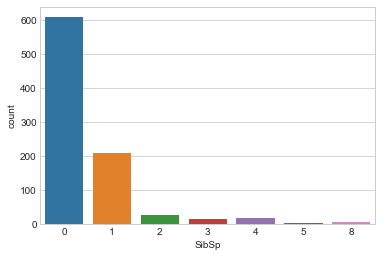

In [46]:
   sns.countplot(x='SibSp', data=train)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### The plot above indicates that majority of the passengers aboard on the ship neither had spouses or children on board and then 0 is followed by 1 which signifies single parents or people with just 1 sibling

C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


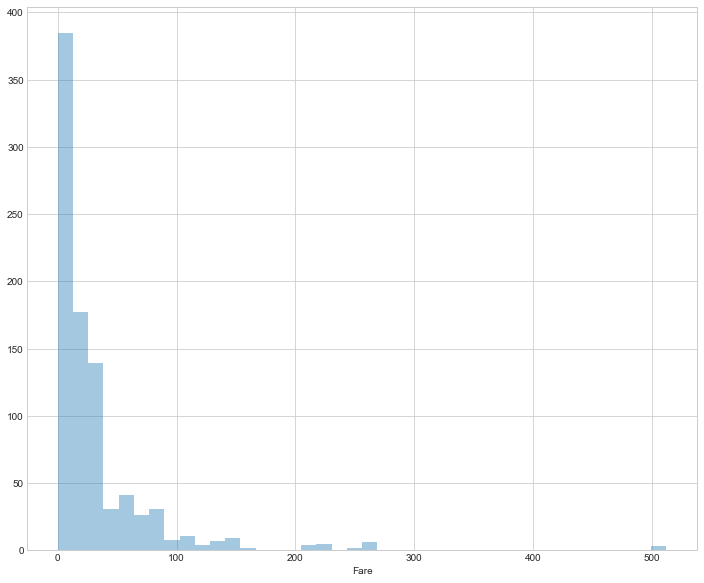

In [57]:
plt.figure(figsize=(12,10))
sns.distplot(train['Fare'], kde=False, bins=40)

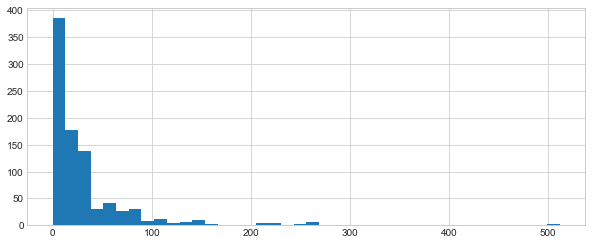

In [58]:
#Using Pandas to achieve the same result

train['Fare'].hist(bins=40,figsize=(10,4))

In [62]:
#Using cufflinks to achieve the same result

# import cufflinks as cf
# cf.go_offline()
# train['Fare'].iplot(kind='hist', bins=30)

C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


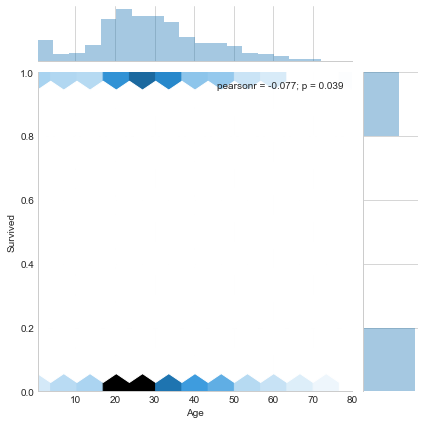

In [66]:
sns.jointplot(x='Age',y='Survived', data=train, kind='hex')

# DATA PREPARATION

## 1st Stage - Dealing with Missing data

### Filling in the missing data using average age per passenger class

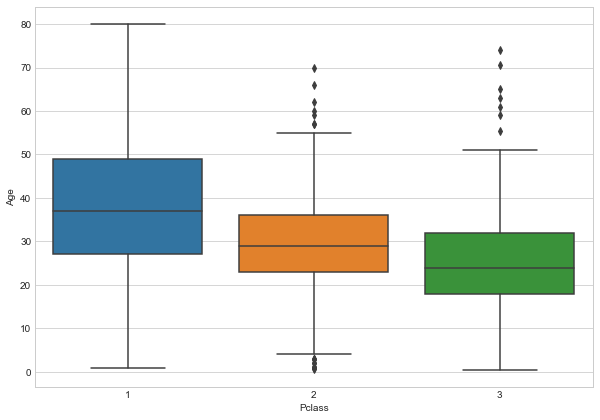

In [69]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data = train)

#### if we separate by class, the wealthier passengers in the first class and second class tend to be a bit older than those in the 3rd, this kind of makes sense if we think about it with regards the fact that wealth may take some time to accumulate so ideally the older the more chances of being richer.

#### we can now use this average age value to predict and fill in the age based on passenger class

In [71]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [75]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

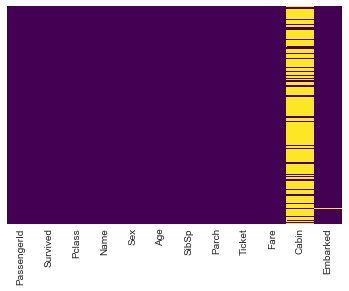

In [80]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

#### Now here, i have successfully put in values that are reasonable guesses for people's ages in the age column

In [86]:
#Since the cabin row is missing way too much data, I go ahead to drop it

train.drop('Cabin', axis=1, inplace=True)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


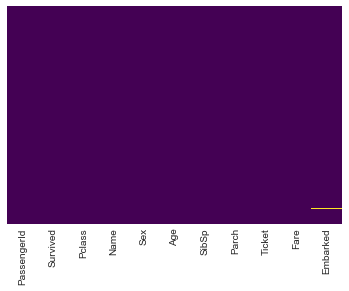

In [87]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### But we still see that the embarked column has a missing data so to solve the problem of this missing data, we actually ahead to drop it since it is not much

In [88]:
train.dropna(inplace=True)

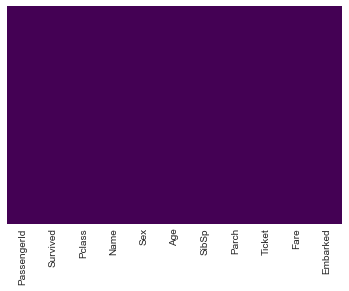

In [89]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## perfect!!! No more missing data

## 2nd Stage - Dealing with Categorical Features

In [94]:
pd.get_dummies(data=train['Sex'])

#The slight issue here is a perfect predictor or the other therefore becomes problematic to be fed to
# a machine learning algorithm, this will result to an issue known as multi-collinearity and this will
# mess up our machine learning algorithm.

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [96]:
# in order to avoid this we do

Sex = pd.get_dummies(data=train['Sex'], drop_first=True)


In [97]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [99]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [100]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [102]:
train = pd.concat([train,Sex,embark],axis=1)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [108]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [106]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Now this looks perfect for our machine learning algorithm

In [111]:
#looking at the passenger id, it looks useless for our machine learning algorithm
#so we can also go ahead and drop it

train.drop(['PassengerId'], axis=1, inplace = True)

In [112]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [115]:
X=train.drop('Survived', axis=1)
y = train['Survived']

In [118]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [119]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [120]:
from sklearn.cross_validation import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
logmodel = LogisticRegression()

In [126]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
predictions=logmodel.predict(X_test)

In [130]:
#For Classification

from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [139]:
#Using confusion matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

In [140]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [141]:
accuracy_score(y_test, predictions)

0.8089887640449438

### From the confusion matrix calculating the accuracy score can also be done by (TP + TN) / total which gives the same value as the f1-score in the classification report and aslo the result of applying the accuracy_score function
